In [7]:
import subprocess, os, glob, shutil
from shutil import copyfile
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap('jet')

<Figure size 432x288 with 0 Axes>

In [8]:
isRunOpt = False# True # ctrl whether we want to run UOF or not and just treat results
isSaveRes = False #False# ctrl whether we want to save results
isPlotRes = True # ctrl whether we want to plot results

# Part 1. Write input for optimization

In [9]:
def optInput(real,seed_base,optimizer,improvement_interval,improvement_percentage,path,seed_optional):
    # step 1. manage the address of the current OPTInput.in
    model_pos_path = '/_models/Template_for_python/Template_for_python_Error_Modeling_Haoyu/'
    fileName = 'OPTInput.in'
    overall_path = path+model_pos_path+fileName

    # step 2. write to the given address with information
    seed = int((real+1)*seed_base)
#     seed = seed_optional[real]
    f=open(overall_path,"w")

    f.write("-- =============================================================================\n")
    f.write("-- Definition of optimization problem\n")
    f.write("-- =============================================================================\n")
    f.write("problem_name\n")
    f.write("Template_for_python_Error_Modeling_Haoyu\n")
    f.write("/\n")
    f.write("\n")
    f.write("number_of_objectives\n")
    f.write("1\n")
    f.write("/\n")
    f.write("\n")
    f.write("number_of_constraints\n")
    f.write("0\n")
    f.write("/\n")
    f.write("\n")
    f.write("constraint_handling_type\n")
    f.write("PENALTY\n")
    f.write("/\n")
    f.write("\n")
    f.write("constraint_handling_penalty_parameter\n")
    f.write("1e-2 /\n")
    f.write("/\n")
    f.write("\n")
    f.write("number_of_real_variables\n")
    f.write("16\n")
    f.write("/\n")
    f.write("\n")
    f.write("number_of_integer_variables\n")
    f.write("0\n")
    f.write("/\n")
    f.write("\n")
    f.write("number_of_categorical_variables\n")
    f.write("0\n")
    f.write("/\n")
    f.write("\n")
    f.write("upper_bound_continuous_variables\n")
    f.write("16*58\n")
    f.write("/\n")
    f.write("\n")
    f.write("lower_bound_continuous_variables\n")
    f.write("16*2\n")
    f.write("/\n")
    f.write("\n")
    f.write("initial_random_seed\n")
    f.write(str(seed)+"\n")
    f.write("/\n")
    f.write("\n")
    f.write("initial_seed_solutions\n")
    f.write("NO\n")
    f.write("--YES initial_solutions.in 1\n")
    f.write("/\n")
    f.write("\n")
    f.write("-- =============================================================================\n")
    f.write("-- Particle Swarm Optimization options \n")
    f.write("-- =============================================================================\n")
    f.write("\n")
    f.write("pso_swarm_size\n")
    f.write("24\n")
    f.write("/\n")
    f.write("\n")
    f.write("pso_w\n")
    f.write("0.729\n")
    f.write("/\n")
    f.write("\n")
    f.write("pso_c1\n")
    f.write("2.05\n")
    f.write("/\n")
    f.write("\n")
    f.write("pso_c2\n")
    f.write("2.05\n")
    f.write("/\n")
    f.write("\n")
    f.write("pso_swarm_connectivity_index\n")
    f.write("24\n")
    f.write("-- algo doesn't use this if topology is 1\n")
    f.write("-- algo use this to calculate the connection per iteration if topology is 2\n")
    f.write("/\n")
    f.write("\n")
    f.write("pso_personalBest_array_size\n")
    f.write("1\n")
    f.write("/\n")
    f.write("\n")
    f.write("pso_mutation_rate\n")
    f.write("0.1\n")
    f.write("/\n")
    f.write("\n")
    f.write("pso_neighbourhood_type\n")
    f.write("2\n")
    f.write("-- if 1 global topology\n")
    f.write("-- if 2 random neighborhood topology\n")
    f.write("/\n")
    f.write("\n")
    f.write("gbest_index\n")
    f.write("0\n")
    f.write("/\n")
    f.write("\n")
    f.write("-- =============================================================================\n")
    f.write("-- Improved Latin Hypercube Sampling options \n")
    f.write("-- =============================================================================\n")
    f.write("\n")
    f.write("ilhs_pop_size\n")
    f.write("24\n")
    f.write("--48\n")
    f.write("/\n")
    f.write("\n")
    f.write("ilhs_entropy\n")
    f.write("0.9\n")
    f.write("/\n")
    f.write("\n")
    f.write("-- =============================================================================\n")
    f.write("-- Differential Evolution options \n")
    f.write("-- =============================================================================\n")
    f.write("\n")
    f.write("de_popsize\n")
    f.write("24\n")
    f.write("/\n")
    f.write("\n")
    f.write("-- mutation factor\n")
    f.write("de_f_factor\n")
    f.write("0.5\n")
    f.write("/\n")
    f.write("\n")
    f.write("-- recombination rate\n")
    f.write("de_crossover_factor\n")
    f.write("0.7\n")
    f.write("/\n")
    f.write("\n")
    f.write("de_strategy\n")
    f.write("9\n")
    f.write("/\n")
    f.write("\n")
    f.write("-- =============================================================================\n")
    f.write("-- System variables related to the problem \n")
    f.write("-- =============================================================================\n")
    f.write("\n")
    f.write("number_of_tasks\n")
    f.write("24\n")
    f.write("/\n")
    f.write("\n")
    f.write("execution_mode\n")
    f.write("--gnu_parallel_mode\n")
    f.write("mpiexec_mode\n")
    f.write("--serial_mode\n")
    f.write("--pbs_mode\n")
    f.write("--slurm_mode\n")
    f.write("/\n")
    f.write("\n")
    f.write("maximum_job_timeout_in_seconds\n")
    f.write("2000\n")
    f.write("/\n")
    f.write("\n")
    f.write("-- =============================================================================\n")
    f.write("-- Algorithm \n")
    f.write("-- =============================================================================\n")
    f.write("\n")
    f.write("algorithm_script\n")
    f.write("algo_name "+optimizer+" algo_termination_criterion improvement "+str(improvement_percentage)+" variables all /\n")
    f.write("/\n")
    f.write("\n")
    f.write("improvement_interval\n")
    f.write(str(improvement_interval)+"\n")
    f.write("/\n")
    f.write("\n")
    f.close()

# Part 2. Clean and Launch UOF optimization

In [10]:
def runOpt(real,path):
    # step 1. manage the path
    overall_path = path
    os.chdir(overall_path)
    print(os.getcwd())
    # step 2. clean previous results
    for name in glob.glob(overall_path+'/*ind_best*'):
        shutil.rmtree(name)
    for name in glob.glob(overall_path+'/*out'):
        os.remove(name)
    for name in glob.glob(overall_path+'/UOF.*'):
        os.remove(name)
    # subprocess.call(['rm','-rf',overall_path+fileName]) # the file name needs to be exact and complete (no '*' here)

    # step 3. run the optimization process
    subprocess.run(["sbatch", "compile_and_run.slurm.mazama", "Template_for_python_Error_Modeling_Haoyu"], capture_output=True)

# Part 3. Put things together and Run

In [35]:
num_reals = 50#1 #20
# ratio = 0.9
num_res = num_reals #int(num_reals*ratio)
base_seed = 50
seed_optional = [6000,7000,8000,1000,2000,3000,4000,5000]#[6000,7000,8000]#[3000]#[210,220,50,1000,2000,3000,4000,5000]
optimizer_folder = 'multiruns_150runs_sys_study_retrain_50upscaled'#_strategy6'
optimizer = 'de'
model_name =['fine','error_stage1','upscale_stage1']#['error_stage1']#
improvement_interval = 60
improvement_percentage = 1
base_path = '/data3/Astro/personal/hytang/opt_error_model_case_3seeds_3d_8wells/retrain_strategy'
model_pos_path = '/_models/Template_for_python/Template_for_python_Error_Modeling_Haoyu/'
optimizer_path = '/'+optimizer_folder 

In [36]:
# batch delete UOF tasks
isQdel = False
if isQdel:
    for i in range(num_reals):
        print('delete queue')
        idx = 6609510 +i
        subprocess.run(["qdel", str(idx)], capture_output=True)    

In [37]:
# cp latest error model to error_stage1
isCPErrMod = False
if isCPErrMod:
    for i in range(num_reals):
        dst = base_path+optimizer_path+'/real'+str(i+1)+'/error_stage1'+model_pos_path
        src = base_path+'/train/100runs_25upsc/error_model_model.pkl'
        subprocess.run(["cp", "-r",src, dst], capture_output=True)  
        src = base_path+'/train/100runs_25upsc/error_model_pca.pkl'
        subprocess.run(["cp", "-r",src, dst], capture_output=True)  
        src = base_path+'/train/100runs_25upsc/error_model_scaler.pkl'
        subprocess.run(["cp", "-r",src, dst], capture_output=True)  

In [38]:
# for i in range(num_reals): #just change one file in all reals
#     subprocess.run(["cp","/data3/Astro/personal/hytang/opt_error_model_case_3seeds_3d_8wells/de/seed1000/error_stage1/_models/Template_for_python/Template_for_python_Error_Modeling_Haoyu/feval.py",
#                 "/data3/Astro/personal/hytang/opt_error_model_case_3seeds_3d_8wells/retrain_strategy/multiruns_100runs_sys_study_retrain_25upscaled/real"+str(i+1)+"/error_stage1/_models/Template_for_python/Template_for_python_Error_Modeling_Haoyu/feval.py"],
#                capture_output=True)  

In [39]:
os.getcwd()

'/data3/Astro/personal/hytang/opt_error_model_case_3seeds_3d_8wells/results/plots'

In [40]:
# only activate this when you need to run optimization of different seeds and models
if isRunOpt:
    os.chdir(base_path)
#     shutil.rmtree(base_path+optimizer_path)
    subprocess.run(["mkdir", optimizer_folder], capture_output=True)   
#     subprocess.run(["cp", "-r","../de/seed1000",optimizer_folder+"/seed1000"], capture_output=True)
    for i in range(num_reals):
        # part 0. create reali folder by cp
        os.chdir(base_path+optimizer_path)
#         subprocess.run(["cp", "-r","seed1000","real"+str(i+1)], capture_output=True)   
        for mod in model_name: 
            # part 0. manage address    
            seed_path = '/real'+str(i+1)
            model_path = '/'+mod
            overall_path = base_path+optimizer_path+seed_path+model_path
            # part 1. write input for optimziation
            optInput(i,base_seed,optimizer,improvement_interval,improvement_percentage,overall_path,seed_optional)
            # part 2. clean and launch UOF optimization
            runOpt(i,overall_path)

# Part 4. Post_process UOF results

1. put all stage 1 results into stage 2 and just evaluate for one step (single fine sim)

2. copy all results from different realizations to one folder

In [41]:
def evalFine(src_dir,dst_dir): 
    model_pos_path = '/_models/Template_for_python/Template_for_python_Error_Modeling_Haoyu'
    dst = dst_dir+model_pos_path#src_dir[0:-1]+str(2)+model_pos_path
    os.chdir(dst)
    # find the x_current file, cp the x_curr to there and run one step fine simulation, finally copy the output feval to the stage 1 folder
    for src in glob.glob(src_dir+'/*ind_best*'):
        copyfile(src+'/x_current_ind.input', dst+'/in.txt')
        os.chdir(dst)
        subprocess.run(['python','feval.py','in.txt','ob.txt'], capture_output=True)
        copyfile(dst+'/ob.txt',src_dir+'/eval_fine.txt')

In [42]:
def saveRes(dst_dir,src_dir,isFine):
    for src in glob.glob(src_dir+'/*ind_best*'):
        src = src+'/x_current_ind.input'
        dst = dst_dir+'/x_current_ind.input'
        copyfile(src, dst)
    for src in glob.glob(src_dir+'/*final_report.out'):
        dst = dst_dir+'/final_report.out'
        copyfile(src, dst)
    if isFine==False: # if we are at upsc or errMod then we also need to copy eval_fine.txt from stage 2
        src = src_dir+'/eval_fine.txt'
        dst = dst_dir+'/eval_fine.txt'
        copyfile(src, dst)   

In [43]:
if isSaveRes:
    dst_dir = '/data3/Astro/personal/hytang/opt_error_model_case_3seeds_3d_8wells/results/'
    os.chdir(dst_dir)
    subprocess.run(["mkdir", optimizer_folder], capture_output=True)
    dst_dir_pre = '/data3/Astro/personal/hytang/opt_error_model_case_3seeds_3d_8wells/results/'+optimizer_folder
    for i in range(num_reals):
        os.chdir(dst_dir_pre)
        subprocess.run(["mkdir", 'real'+str(i+1)], capture_output=True)
        for mod in model_name: 
            # part 1. manage address and folders
            seed_path = '/real'+str(i+1)
            model_path = '/'+mod
            os.chdir(dst_dir_pre+'/'+'real'+str(i+1))
            subprocess.run(["mkdir", mod], capture_output=True)
            src_dir = base_path+optimizer_path+seed_path+model_path
            dst_dir = dst_dir_pre+seed_path+model_path
            # part 2. copy files from stage 1 to stage 2 and only evaulate once    
            isFine = True
            if mod != 'fine':
                evalFine(src_dir,base_path+optimizer_path+seed_path+'/fine')
                isFine = False   
            # part 3. copy all results from fine, err_stage1/2, and ups_stage1/2 to 'Results'
            saveRes(dst_dir,src_dir,isFine)

# Part 5. Plot results for each realizationsm

In [44]:
base_path = '/data3/Astro/personal/hytang/opt_error_model_case_3seeds_3d_8wells'

In [45]:
optimizer_path

'/multiruns_150runs_sys_study_retrain_50upscaled'

In [46]:
if isPlotRes:
    Billion = 1000000000
    res_path = base_path +'/results'
    plot_path = res_path +'/plots'
    os.chdir(plot_path)
#     subprocess.run(["mkdir", optimizer_folder], capture_output=True)
    plot_path = plot_path + optimizer_path
    res_path = res_path + optimizer_path
    print(res_path)
    
    feval_fine = []
    npv_fine = []
    npv_f_fine = []
    feval_err = []
    npv_err = []
    npv_f_err = []
    npv_err_f = []
    feval_upsc = []
    npv_upsc = []
    npv_f_upsc = []
    npv_upsc_f = []
    rank = []
    for i in range(num_reals):
        for mod in model_name: 
            # part 1. manage address and folders
            seed_path = '/real'+str(i+1)
            model_path = '/'+mod
            curr_path = res_path+seed_path+model_path
            # part 2. take out data from each model type need if else to figure out
            fileName = '/final_report.out'
            df = pd.read_fwf(curr_path+fileName)
            feval = df['FEVAL']
            npv = -df['FITNESS']/Billion
            if mod == 'fine':
                feval_fine.append(feval)
                npv_fine.append(npv)
                npv_f_fine.append(npv.iloc[-1])
            if mod == 'error_stage1':
                feval_err.append(feval)
                npv_err.append(npv)
                fileName = '/eval_fine.txt'
                f = open(curr_path+fileName, "r")
                npv_f_err.append(float(f.readlines()[0])/Billion)
                npv_err_f.append(npv.iloc[-1])
            if mod == 'upscale_stage1':
                feval_upsc.append(feval)
                npv_upsc.append(npv)
                fileName = '/eval_fine.txt'
                f = open(curr_path+fileName, "r")
                npv_f_upsc.append(float(f.readlines()[0])/Billion)
                npv_upsc_f.append(npv.iloc[-1])
        rank.append(npv_f_err[i]-npv_f_upsc[i])

/data3/Astro/personal/hytang/opt_error_model_case_3seeds_3d_8wells/results/multiruns_150runs_sys_study_retrain_50upscaled


In [49]:
npv_f_err[34]

2.996563074

In [47]:
np.argsort(npv_f_err)

array([13, 46, 21, 12, 24, 36, 29, 38, 25, 26, 48,  6, 49,  4, 32, 14, 47,
       42, 23,  0, 39, 35,  8,  3,  9, 41,  7, 30, 17,  1, 27, 33, 18, 11,
        2, 37, 16, 10, 28,  5, 44, 19, 20, 22, 45, 15, 31, 43, 34, 40])

In [253]:
# # add a few fine evalulations in the process of error model (done by hand) based on specific idx_fine (= 8)
# feval_err_mid = np.array([360,816,1944])#,172])*24
# npv_f_err_mid = np.array([2.073,2.395,2.562])#,2.403])

In [254]:
# # # add a few fine evalulations in the process of error model (done by hand) based on specific idx_fine (= 0)
# feval_err_mid = np.array([144])#,172])*24
# npv_f_err_mid = np.array([])#,2.403])

In [300]:
index = [17,23,6]
for i in range(len(index)):
    print(npv_fine[index[i]].iloc[-1])
    print(npv_f_err[index[i]])
    print(npv_f_upsc[index[i]])

2.700444068
[2.45214566]
[2.40685849]
2.542680795
[2.4546161]
[2.3722616]
2.377285838
[2.29442038]
[2.21328962]


In [255]:
np.argsort(npv_f_fine,axis=0)

array([ 2, 12, 20,  3, 21,  6, 10, 18, 11,  0, 14,  1, 19, 23,  9,  8, 13,
       24, 17,  7, 15, 16,  5,  4, 22])

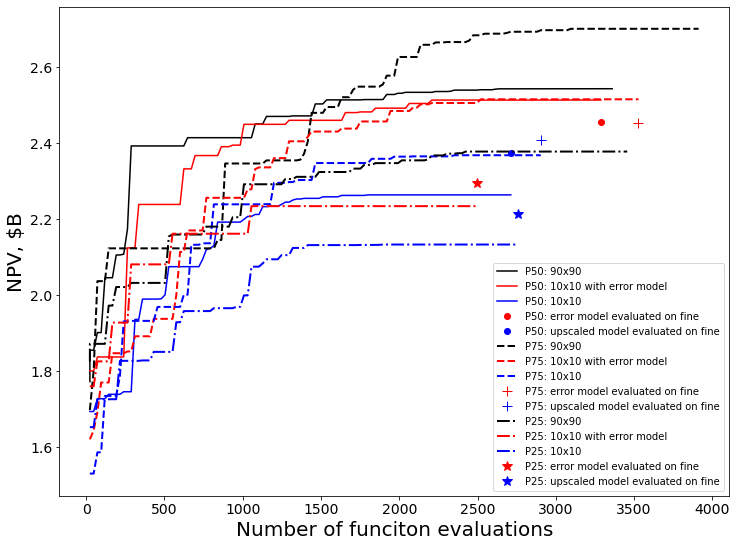

In [256]:
if isPlotRes:   
    # part 4. plot median npv for fine upsc and errMod
    plt.figure(figsize=(12,9))
    idx_fine = 23  #19 # decided based on previous two blocks value #np.argsort(npv_f_fine,axis=0)[num_res//2][0]+1#
    plt.plot(feval_fine[idx_fine],npv_fine[idx_fine],'k')
    plt.plot(feval_err[idx_fine],npv_err[idx_fine],'r')
    plt.plot(feval_upsc[idx_fine],npv_upsc[idx_fine],'b')
    plt.plot(feval_err[idx_fine].iloc[-1],npv_f_err[idx_fine],'ro')
    plt.plot(feval_upsc[idx_fine].iloc[-1],npv_f_upsc[idx_fine],'bo')
    idx_fine = 17#24  # decided based on previous two blocks value #np.argsort(npv_f_fine,axis=0)[num_res//2][0]+1#
    plt.plot(feval_fine[idx_fine],npv_fine[idx_fine],'k--', linewidth=2, markersize=3)
    plt.plot(feval_err[idx_fine],npv_err[idx_fine],'r--', linewidth=2, markersize=3)
    plt.plot(feval_upsc[idx_fine],npv_upsc[idx_fine],'b--', linewidth=2, markersize=3)
    plt.plot(feval_err[idx_fine].iloc[-1],npv_f_err[idx_fine],'r+',markersize=10)
    plt.plot(feval_upsc[idx_fine].iloc[-1],npv_f_upsc[idx_fine],'b+',markersize=10) 
    idx_fine = 6#10  # decided based on previous two blocks value #np.argsort(npv_f_fine,axis=0)[num_res//2][0]+1#
    plt.plot(feval_fine[idx_fine],npv_fine[idx_fine], 'k-.', linewidth=2, markersize=3)
    plt.plot(feval_err[idx_fine],npv_err[idx_fine],'r-.', linewidth=2, markersize=3)
    plt.plot(feval_upsc[idx_fine],npv_upsc[idx_fine],'b-.', linewidth=2, markersize=3)
    plt.plot(feval_err[idx_fine].iloc[-1],npv_f_err[idx_fine],'r*',markersize=10)
    plt.plot(feval_upsc[idx_fine].iloc[-1],npv_f_upsc[idx_fine],'b*',markersize=10) 
    plt.xlabel('Number of funciton evaluations',fontsize=20)
    plt.ylabel('NPV, $B',fontsize=20)
    plt.legend(['P50: 90x90', 'P50: 10x10 with error model', 'P50: 10x10','P50: error model evaluated on fine','P50: upscaled model evaluated on fine',
               'P75: 90x90', 'P75: 10x10 with error model', 'P75: 10x10','P75: error model evaluated on fine','P75: upscaled model evaluated on fine',
               'P25: 90x90', 'P25: 10x10 with error model', 'P25: 10x10','P25: error model evaluated on fine','P25: upscaled model evaluated on fine'])
    plt.xticks(fontsize=14, rotation=0)
    plt.yticks(fontsize=14, rotation=0)
    plt.show()

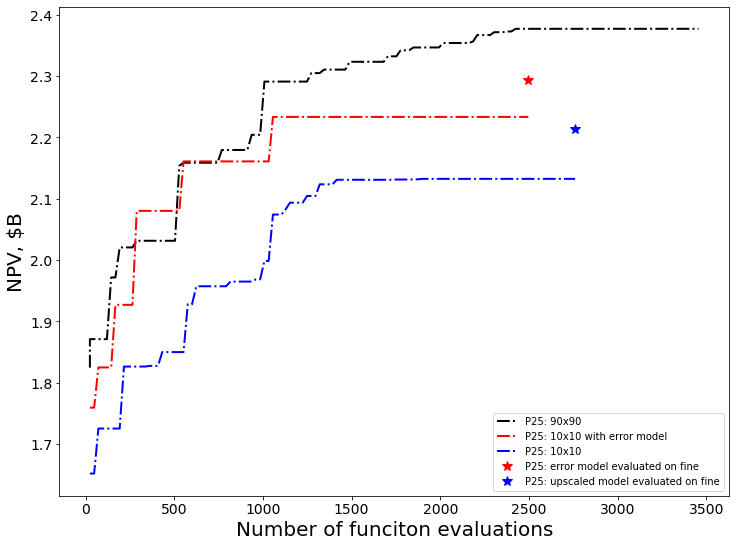

In [297]:
if isPlotRes:   
    # part 4. plot median npv for fine upsc and errMod
    plt.figure(figsize=(12,9))
    idx_fine = 6#10  # decided based on previous two blocks value #np.argsort(npv_f_fine,axis=0)[num_res//2][0]+1#
    plt.plot(feval_fine[idx_fine],npv_fine[idx_fine], 'k-.', linewidth=2, markersize=3)
    plt.plot(feval_err[idx_fine],npv_err[idx_fine],'r-.', linewidth=2, markersize=3)
    plt.plot(feval_upsc[idx_fine],npv_upsc[idx_fine],'b-.', linewidth=2, markersize=3)
    plt.plot(feval_err[idx_fine].iloc[-1],npv_f_err[idx_fine],'r*',markersize=10)
    plt.plot(feval_upsc[idx_fine].iloc[-1],npv_f_upsc[idx_fine],'b*',markersize=10) 
    plt.xlabel('Number of funciton evaluations',fontsize=20)
    plt.ylabel('NPV, $B',fontsize=20)
    plt.legend(['P25: 90x90', 'P25: 10x10 with error model', 'P25: 10x10','P25: error model evaluated on fine','P25: upscaled model evaluated on fine'])
    plt.xticks(fontsize=14, rotation=0)
    plt.yticks(fontsize=14, rotation=0)
    plt.show()

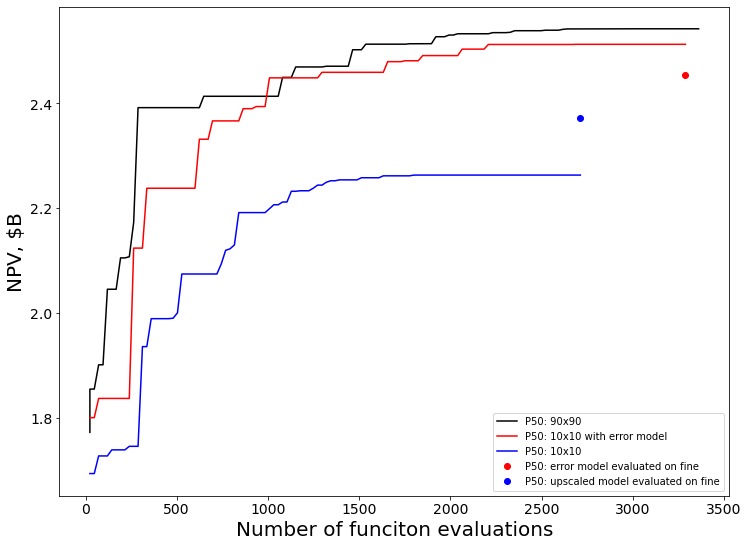

In [295]:
if isPlotRes:   
    # part 4. plot median npv for fine upsc and errMod
    plt.figure(figsize=(12,9))
    idx_fine = 23  #19 # decided based on previous two blocks value #np.argsort(npv_f_fine,axis=0)[num_res//2][0]+1#
    plt.plot(feval_fine[idx_fine],npv_fine[idx_fine],'k')
    plt.plot(feval_err[idx_fine],npv_err[idx_fine],'r')
    plt.plot(feval_upsc[idx_fine],npv_upsc[idx_fine],'b')
    plt.plot(feval_err[idx_fine].iloc[-1],npv_f_err[idx_fine],'ro')
    plt.plot(feval_upsc[idx_fine].iloc[-1],npv_f_upsc[idx_fine],'bo')
    plt.xlabel('Number of funciton evaluations',fontsize=20)
    plt.ylabel('NPV, $B',fontsize=20)
    plt.legend(['P50: 90x90', 'P50: 10x10 with error model', 'P50: 10x10','P50: error model evaluated on fine','P50: upscaled model evaluated on fine'])
    plt.xticks(fontsize=14, rotation=0)
    plt.yticks(fontsize=14, rotation=0)
    plt.show()

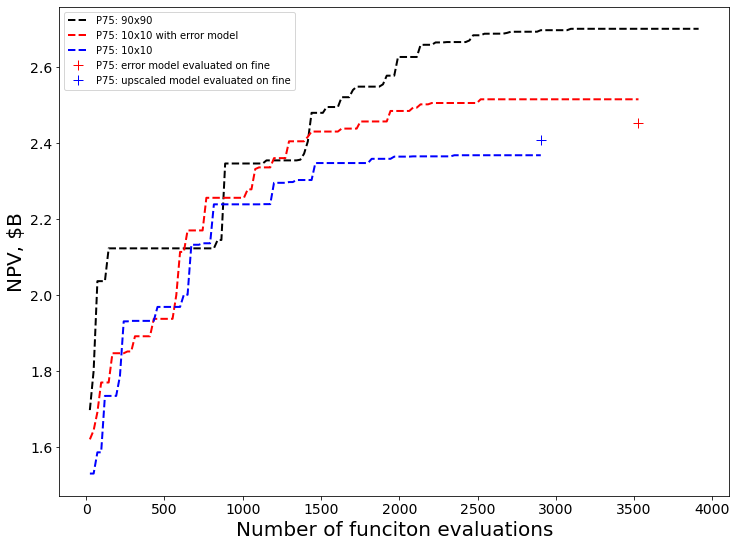

In [296]:
if isPlotRes:   
    # part 4. plot median npv for fine upsc and errMod
    plt.figure(figsize=(12,9))
    idx_fine = 17#24  # decided based on previous two blocks value #np.argsort(npv_f_fine,axis=0)[num_res//2][0]+1#
    plt.plot(feval_fine[idx_fine],npv_fine[idx_fine],'k--', linewidth=2, markersize=3)
    plt.plot(feval_err[idx_fine],npv_err[idx_fine],'r--', linewidth=2, markersize=3)
    plt.plot(feval_upsc[idx_fine],npv_upsc[idx_fine],'b--', linewidth=2, markersize=3)
    plt.plot(feval_err[idx_fine].iloc[-1],npv_f_err[idx_fine],'r+',markersize=10)
    plt.plot(feval_upsc[idx_fine].iloc[-1],npv_f_upsc[idx_fine],'b+',markersize=10) 
    plt.xlabel('Number of funciton evaluations',fontsize=20)
    plt.ylabel('NPV, $B',fontsize=20)
    plt.legend(['P75: 90x90', 'P75: 10x10 with error model', 'P75: 10x10','P75: error model evaluated on fine','P75: upscaled model evaluated on fine'])
    plt.xticks(fontsize=14, rotation=0)
    plt.yticks(fontsize=14, rotation=0)
    plt.show()

In [257]:
# if isPlotRes:   
#     # part 4. plot median npv for fine upsc and errMod
#     idx_fine = 14#np.argsort(npv_f_fine,axis=0)[num_reals//2][0]+1
#     plt.figure(figsize=(8,5))
#     plt.plot(feval_fine[idx_fine],npv_fine[idx_fine],'k')
#     plt.plot(feval_err[idx_fine],npv_err[idx_fine],'r')
#     plt.plot(feval_upsc[idx_fine],npv_upsc[idx_fine],'b')
# #     plt.plot(feval_err_mid,npv_f_err_mid,'ro')
#     plt.plot(feval_err[idx_fine].iloc[-1],npv_f_err[idx_fine],'ro') 
#     plt.plot(feval_upsc[idx_fine].iloc[-1],npv_f_upsc[idx_fine],'bo') 
#     plt.xlabel('Number of funciton evaluations')
#     plt.ylabel('NPV, $B')
# #     plt.legend(['60x60x30','10x10x10','upscaled model evaluated on fine'],loc='lower right')
#     plt.legend(['60x60x30','10x10x10 with error model', '10x10x10','error model evaluated on fine','upscaled model evaluated on fine'],loc='lower right')
#     plt.show()

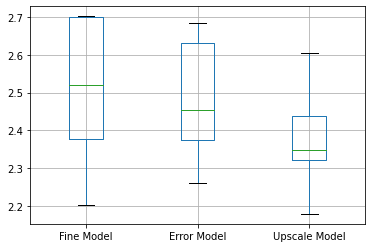

In [258]:
if isPlotRes:
    # part 3. plot general statistics for all realizations
    npv_f_fine = np.array(npv_f_fine).reshape(-1,1)
    npv_f_err = np.array(npv_f_err).reshape(-1,1)
    npv_f_upsc = np.array(npv_f_upsc).reshape(-1,1)
    rank = np.array(rank).reshape(-1,1)
    order = np.argsort(rank,axis=0)
    f1 = npv_f_fine[order].reshape(-1,1);f2=npv_f_err[order].reshape(-1,1);f3=npv_f_upsc[order].reshape(-1,1)
    all_data = np.concatenate((f1[:num_res], f2[:num_res]),axis=1)
    all_data = np.concatenate((all_data, f3[:num_res]),axis=1)
    df = pd.DataFrame(all_data,
                   columns=['Fine Model', 'Error Model', 'Upscale Model'])
    boxplot = df.boxplot(column=['Fine Model', 'Error Model', 'Upscale Model'],showfliers=False)

In [168]:
npv_f_upsc

array([[2.34771286],
       [2.66098072],
       [2.4527108 ],
       [2.32240816],
       [2.42741247],
       [2.34631236],
       [2.21328962],
       [2.39009164],
       [2.24611815],
       [2.60431881],
       [2.67417179],
       [2.4388324 ],
       [2.3168612 ],
       [2.34130702],
       [2.34771286],
       [2.17819061],
       [2.34631236],
       [2.40685849],
       [2.27102893],
       [2.34260889],
       [2.6600452 ],
       [2.34771286],
       [2.64666046],
       [2.3722616 ],
       [2.1261875 ]])

In [139]:
# if isPlotRes:
#     npv_err_f = np.array(npv_err_f).reshape(-1,1)
#     npv_upsc_f = np.array(npv_upsc_f).reshape(-1,1)
#     f2_f = npv_err_f[order].reshape(-1,1)
#     f3_f = npv_upsc_f[order].reshape(-1,1)
#     f_diff1 = np.abs(f2_f-f2)/f2_f;f_diff2 = np.abs(f3_f-f3)/f3_f;
#     all_diff_data = np.concatenate((f_diff1[-num_res:], f_diff2[-num_res:]),axis=1)
#     df = pd.DataFrame(all_diff_data,
#                    columns=['Error Model Diff', 'Upscale Model Diff'])
#     boxplot = df.boxplot(column=['Error Model Diff', 'Upscale Model Diff'],showfliers=False)

In [140]:
f_diff1.shape

(15, 1)

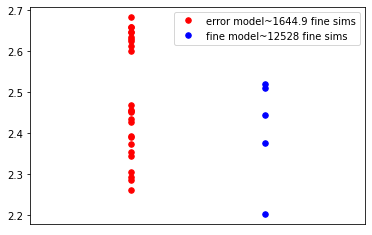

In [315]:
# use less seed in fine but still keep around 10X speedup
import random
isUseRand=False #True# we can either use randomly picked (True) or use percentile (False)
marksize = 5.5
num_fine = 5#num_res//5
x_fine = np.zeros(npv_f_fine.shape)
npv_f_fine_less = np.zeros((num_fine,1))
if isUseRand:
    rand_idx = [1,3,8] #
    for i in range(num_fine):
        rand_idx = random.randint(0, num_res-1)
        print(rand_idx)
        npv_f_fine_less[i] = npv_f_fine[rand_idx]
else:
    npv_f_fine_less[0] = npv_f_fine[0]
    npv_f_fine_less[1] = npv_f_fine[1]
    npv_f_fine_less[2] = npv_f_fine[3]
    npv_f_fine_less[3] = npv_f_fine[2]
    npv_f_fine_less[4] = npv_f_fine[19]
plt.plot(x_fine+0.75,npv_f_err, 'ro', markersize=marksize)
plt.plot(x_fine[:num_fine]+1.75,npv_f_fine_less, 'bo', markersize=marksize)
plt.xlim([0,2.5])
plt.legend(['error model~1644.9 fine sims','fine model~12528 fine sims'])
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)

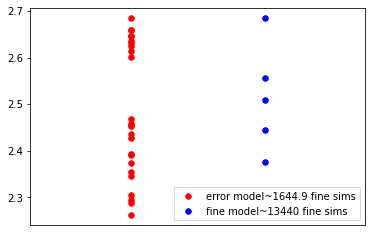

In [316]:
# use less seed in fine but still keep around 10X speedup
import random
isUseRand=False #True# we can either use randomly picked (True) or use percentile (False)
marksize = 5.5
num_fine = 5#num_res//5
x_fine = np.zeros(npv_f_fine.shape)
npv_f_fine_less = np.zeros((num_fine,1))
if isUseRand:
    rand_idx = [1,3,8] #
    for i in range(num_fine):
        rand_idx = random.randint(0, num_res-1)
        print(rand_idx)
        npv_f_fine_less[i] = npv_f_fine[rand_idx]
else:
    npv_f_fine_less[0] = npv_f_fine[0]
    npv_f_fine_less[1] = npv_f_fine[1]
    npv_f_fine_less[2] = npv_f_fine[3]
    npv_f_fine_less[3] = npv_f_fine[8]
    npv_f_fine_less[4] = npv_f_fine[13]
plt.plot(x_fine+0.75,npv_f_err, 'ro', markersize=marksize)
plt.plot(x_fine[:num_fine]+1.75,npv_f_fine_less, 'bo', markersize=marksize)
plt.xlim([0,2.5])
plt.legend(['error model~1644.9 fine sims','fine model~13440 fine sims'])
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)

In [313]:
npv_f_err[22]

array([2.68438383])

In [214]:
sum_err = 0
for i in range(num_reals):
    sum_err += feval_err[i].iloc[-1]+feval_upsc[i].iloc[-1]

In [215]:
sum_fine = 0
for i in range(num_reals):
    sum_fine += feval_fine[i].iloc[-1]

In [289]:
sum_fine_less = 0
index = [0,1,3,2,19]
for i in range(len(index)):
    sum_fine_less+=feval_fine[index[i]].iloc[-1]

In [290]:
sum_fine_less

12528

In [216]:
sum_fine

73104

In [217]:
sum_err/6/6/3

1644.888888888889

In [147]:
max(npv_f_err)

array([2.68438383])

In [ ]:
feval_fine[idx_fine].iloc[-1]/24

In [ ]:
feval_err[idx_fine].iloc[-1]/24

In [ ]:
feval_err[idx_fine].iloc[-1]/24/81

In [ ]:
npv_f_err[idx_fine]

In [ ]:
npv_f_upsc[idx_fine]

In [ ]:
npv_fine[idx_fine].iloc[-1]

In [ ]:
(npv_err[idx_fine].iloc[-1]-npv_f_err[idx_fine])/npv_err[idx_fine].iloc[-1]

In [ ]:
(npv_upsc[idx_fine].iloc[-1]-npv_f_upsc[idx_fine])/npv_upsc[idx_fine].iloc[-1]

In [ ]:
num_res